# This notebook reproduces the slit interference simulations in Figures 2 and S5

In [6]:
import numpy as np
from shapely.geometry import box
from mbhl.simulation import Mask, Physics, System, Circle, Rectangle, Square
from mbhl.simulation import nm, um
import matplotlib.pyplot as plt
import figurefirst as ff
from pathlib import Path

In [7]:
%mkdir -p subfigs-Fig2-FigS5

`plot_line` renders the top-viewed line interference and corresponding height profiles in tiff formats. For post-processing of the tiff files, a 3D engine like [Gwyddion](http://gwyddion.net) is required.

In [8]:
def plot_line(
    ax,
    # Line width
    s1=100 * nm,
    # Spacing
    s2=100 * nm,
    # Default offset
    offset=500 * nm,
    # Line length
    ll=13 * um,
    diffusion=15 * nm,
    default_h=10 * nm,
    default_alpha=1.0,
    drift=0 * nm,
    lim=(0.5 * um, 3.5 * um, 0.5 * um, 3.5 * um),
    gap=2.5 * um,
    cmap="viridis",
    alpha=1.0,
    h_ratio=1.0,
    n_pts=1,
    angle_offset=30,
):
    
    H = gap
    psi = np.arctan(offset / H)
    trajectory = np.array(
        [(psi, theta) for theta in np.deg2rad(np.linspace(angle_offset + 0, angle_offset + 360, n_pts + 1))[:-1]]
    )
    phys = Physics(trajectory, diffusion=diffusion, drift=drift)
    W = s1 + s2
    pos = [Rectangle(W / 2 - s1 / 2, 0, s1, ll)]
    cell = (W, ll)
    size=lim[3] * 2
    repeat_x = max(2, int(size / W))
    mask = Mask(
        pos,
        unit_cell=cell,
        repeat=(repeat_x, 1),
        pad=50 * nm,
        spacing=H,
    )
    system = System(mask=mask, physics=phys)
    conv = system.simulate(h=default_h / h_ratio)
    ax.set_axis_off()
    system.draw(
        ax,
        mask_alpha=1.0,
        show_mask=False,
        cmap=cmap,
        mask_lw=0,
        xlim=lim[:2],
        ylim=lim[2:],
        alpha=alpha,
    )
    return system

In [9]:
def lambda_to_s(l1, l2, R):
    """Function to translate (\lambda_1, \lambda_2) to (s_1, s_2)
    """
    s1 = 2 * R / (1 / l2 - 1)
    s2 = s1 / l1 - s1
    return s1, s2

1. Below are sub-panels in figure2

0.23076923076923075 0.2727272727272727
300.0 1000.0
(2621, 3201)


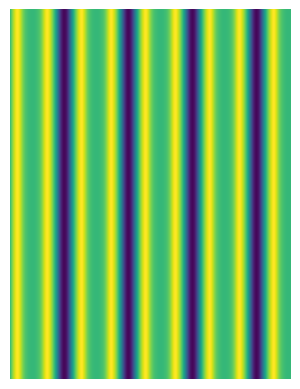

In [10]:
# Fully separated case
offset = 400 * nm
s1 = 300 * nm
s2 = 1000 * nm
l1 = s1 / (s1 + s2)
l2 = s1 / (offset * 2 + s1)
print(l1, l2)
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system = plot_line(plt.gca(),
                   s1=s1,
                   s2=s2,
                   offset=offset,
                   diffusion=50 * nm,
                   n_pts=360, 
                   cmap="viridis", 
                   angle_offset=90,
                   default_h=5 * nm,
                   lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um))
system.save_tiff(h=5 * nm, 
                 fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")

0.33333333333333337 0.297029702970297
300.0 599.9999999999999
(2621, 3140)


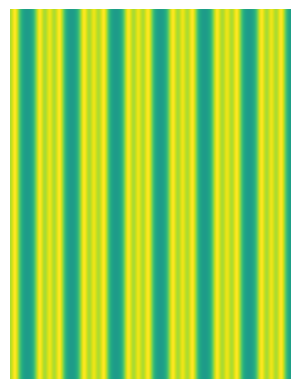

In [11]:
# Sawtooth pattern
offset = 355 * nm
s1 = 300 * nm
s2 = 600 * nm
l1 = s1 / (s1 + s2)
l2 = s1 / (offset * 2 + s1)
print(l1, l2)
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system = plot_line(plt.gca(),
                   s1=s1,
                   s2=s2,
                   offset=offset,
                   diffusion=50 * nm,
                   n_pts=360, 
                   cmap="viridis", 
                   angle_offset=90,
                   default_h=5 * nm,
                   lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um))
system.save_tiff(h=5 * nm, fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")

0.4285714285714286 0.28846153846153844
300.0 399.99999999999994
(2621, 3300)


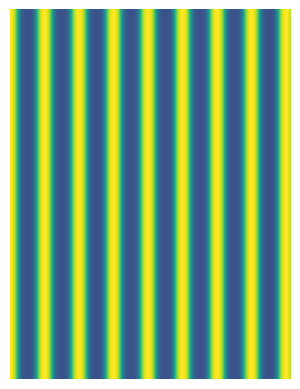

In [12]:
# Comb pattern
offset = 370 * nm
s1 = 300 * nm
s2 = 400 * nm
l1 = s1 / (s1 + s2)
l2 = s1 / (offset * 2 + s1)
print(l1, l2)
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system = plot_line(plt.gca(),
                   s1=s1,
                   s2=s2,
                   offset=offset,
                   diffusion=50 * nm,
                   n_pts=360, 
                   cmap="viridis", 
                   angle_offset=90,
                   default_h=5 * nm,
                   lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um))
system.save_tiff(h=5 * nm, fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")

0.5555555555555556 0.13440860215053763
250.0 199.99999999999994
(2621, 3310)


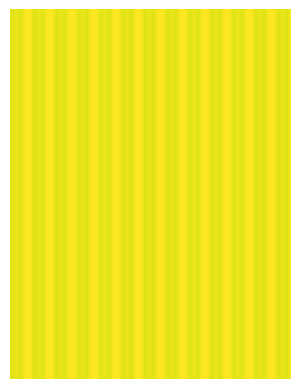

In [13]:
# Higher-order pattern
offset = 805 * nm
s1 = 250 * nm
s2 = 200 * nm
l1 = s1 / (s1 + s2)
l2 = s1 / (offset * 2 + s1)
print(l1, l2)
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system = plot_line(plt.gca(),
                   s1=s1,
                   s2=s2,
                   offset=offset,
                   diffusion=50 * nm,
                   n_pts=360, 
                   cmap="viridis", 
                   angle_offset=90,
                   default_h=5 * nm,
                   lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um))
system.save_tiff(h=5 * nm, fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")

2. Below are the CL-simulated sub-panels in Figure S5

981.8181818181816 528.6713286713285
(2621, 3238)


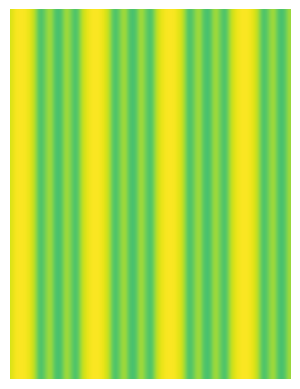

In [14]:
# Sawtooth pattern with larger \lambda_1
offset = 600 * nm
l1 = 0.65
l2 = 0.45
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system = plot_line(plt.gca(),
                   s1=s1,
                   s2=s2,
                   offset=offset,
                   diffusion=50 * nm,
                   n_pts=360, 
                   cmap="viridis", 
                   angle_offset=90,
                   default_h=5 * nm,
                   lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um))
system.save_tiff(h=5 * nm, fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")

799.9999999999999 266.6666666666667
(2621, 3167)


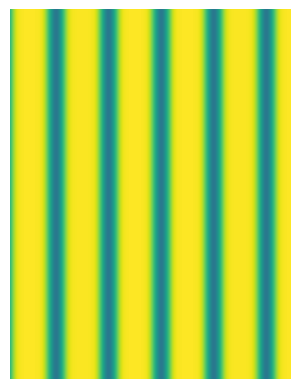

In [15]:
# Comb pattern with larger \lambda_1
offset = 600 * nm
l1 = 0.75
l2 = 0.40
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system = plot_line(plt.gca(),
                   s1=s1,
                   s2=s2,
                   offset=offset,
                   diffusion=50 * nm,
                   n_pts=360, 
                   cmap="viridis", 
                   angle_offset=90,
                   default_h=5 * nm,
                   lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um))
system.save_tiff(h=5 * nm, fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")

399.99999999999994 70.58823529411767
(2621, 3395)


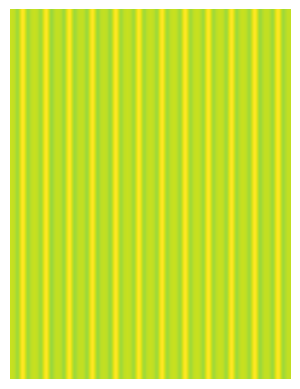

In [16]:
# Higher-order with larger \lambda_1
offset = 600 * nm
l1 = 0.85
l2 = 0.25
s1, s2 = lambda_to_s(l1, l2, R=offset)
print(s1 / nm, s2 / nm)
system = plot_line(plt.gca(),
                   s1=s1,
                   s2=s2,
                   offset=offset,
                   diffusion=30 * nm,
                   n_pts=360, 
                   cmap="viridis", 
                   angle_offset=90,
                   default_h=5 * nm,
                   lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um))
system.save_tiff(h=5 * nm, fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")

0.010000000000000002 0.05
73.6842105263158 7294.736842105262
(2621, 1509)


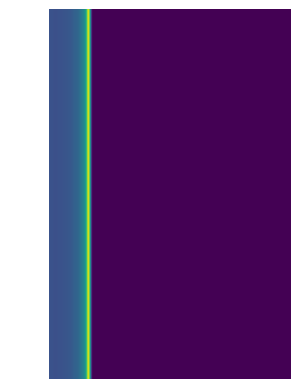

0.05 0.25
466.66666666666674 8866.666666666666
(2621, 1981)


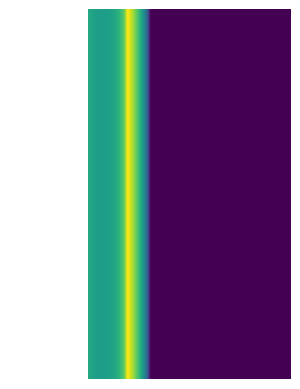

0.1 0.5
1400.0 12600.0
(2621, 3100)


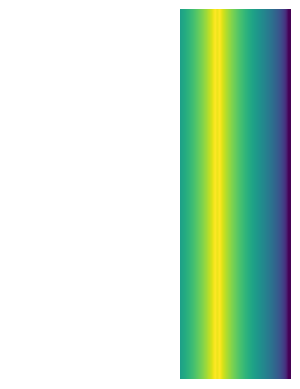

In [17]:
# Approximated lambda_1 --> 0 cases
# The 3D topography were extracted from the distantly-separated periodic line interferences
for l2 in (0.05, 0.25, 0.50):
    offset = 700 * nm
    l2 = l2
    l1 = 0.2 * l2
    print(l1, l2)
    s1, s2 = lambda_to_s(l1, l2, R=offset)
    print(s1 / nm, s2 / nm)
    system = plot_line(plt.gca(),
                       s1=s1,
                       s2=s2,
                       offset=offset,
                       n_pts=360, 
                       cmap="viridis", 
                       angle_offset=90,
                       default_h=5 * nm,
                       lim=(2.8 * um, 8.5 * um, 1.0 * um, 8.5 * um))
    plt.show()
    system.save_tiff(h=5 * nm, 
                     fname=f"subfigs-Fig2-FigS5/fitting_l1-{l1:.2f}_l2-{l2:.2f}.tiff")